In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import random
import pickle
import joblib
import cv2
import tensorflow as tf
import keras
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.applications import imagenet_utils
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from keras.utils.vis_utils import plot_model

# Importing Images


In [ ]:
data_paths = "/content/drive/My Drive/Datasets_New"
spam_path = data_paths + "/fakeImages"
normal_path = data_paths + "/trueIm

ages"

In [ ]:
print(data_paths,spam_path,normal_path)

/content/drive/My Drive/Datasets_New /content/drive/My Drive/Datasets_New/fakeImages /content/drive/My Drive/Datasets_New/trueImages


In [ ]:
labels = []
training_labels = []
test_labels = []
training_images = []
testing_images =[]

In [ ]:
imagePaths = list(paths.list_images(data_paths))


# Pre-Processing

In [ ]:
data = []
labels = []
random.shuffle(imagePaths)
# loop over the image paths
for imagePath in imagePaths:
  label = imagePath.split(os.path.sep)[-2][:-6]
  value = 1 if label == 'true' else 0
  print(imagePath)
  image = load_img(imagePath, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  data.append(image)
  labels.append(value)
print(labels[:5])


/content/drive/My Drive/Datasets_New/trueImages/ia_100000000431.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000093.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000000461.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000000332.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000170.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake47.jpg
/content/drive/My Drive/Datasets_New/fakeImages /Z (1).jpeg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000091.jpg
/content/drive/My Drive/Datasets_New/fakeImages /maxresdefault.jpg
/content/drive/My Drive/Datasets_New/fakeImages /images (3).jpeg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000140.png
/content/drive/My Drive/Datasets_New/fakeImages /fake72.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake53.jpg
/content/drive/My Drive/Datasets_New/fakeImages /7_Photos_of_Fake_Body_Transformation_That_is_Why_You_Should_Not_Trust_Before_and_After_Pictures_7.jpg
/content/driv

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/content/drive/My Drive/Datasets_New/trueImages/ia_100000000316.jpg
/content/drive/My Drive/Datasets_New/trueImages/true36.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake45.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake133.jpg
/content/drive/My Drive/Datasets_New/trueImages/Juices-for-a-juice-cleanse-before-exercise.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake67.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000062.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake78.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000000371.jpg
/content/drive/My Drive/Datasets_New/trueImages/Loreal-Paris-BMAG-Article-How-Much-Can-Hair-Grow-in-a-Month-D.jpg
/content/drive/My Drive/Datasets_New/fakeImages /fake110.jpg
/content/drive/My Drive/Datasets_New/fakeImages /before-after-harry-styles-before-and-after-photoshop-by-thalesrc-b_1.jpg
/content/drive/My Drive/Datasets_New/trueImages/ia_100000063.png
/content/drive/My Drive/Datasets_New/trueI

In [ ]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
print(np.shape(data))
print(labels)

(464, 224, 224, 3)
[1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1]


In [ ]:
print(np.shape(labels))

(464,)


In [ ]:
(training_images, testing_images, training_labels, testing_labels) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


## EDA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


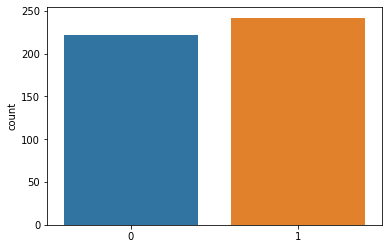

In [ ]:
sns.countplot(labels)

#Almost balanced

In [ ]:
def img2np(path, size = (64, 64)):
  for fp in path:
    current_image = load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
    img_ts = img_to_array(current_image)
    img_ts = [img_ts.ravel()]
    try:
      full_mat = np.concatenate((full_mat, img_ts))
    except UnboundLocalError: 
      full_mat = img_ts
  return full_mat

true_imgs = list(paths.list_images(normal_path))
fake_imgs = list(paths.list_images(spam_path+" "))

true_images = img2np(true_imgs)
fake_images = img2np(fake_imgs)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


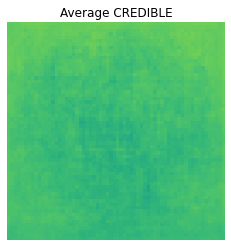

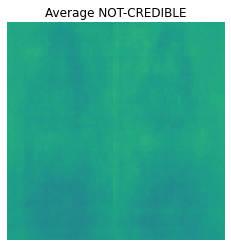

In [ ]:
#Visualising how the Average Image Looks like
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img
  
true_mean = find_mean_img(true_images, 'CREDIBLE')
fake_mean = find_mean_img(fake_images, 'NOT-CREDIBLE')

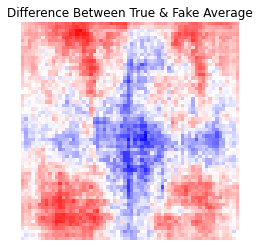

In [ ]:
contrast_mean = true_mean - fake_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between True & Fake Average')
plt.axis('off')
plt.show()

# Transfer-Learning (Creating Base & Head Model)

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [ ]:
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

## With data augmentation


In [ ]:
#WIth data augmentation
model_aug = Model(inputs=baseModel.input, outputs=headModel)
model_aug.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model_aug.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [ ]:
print("[INFO] training head...")
H = model_aug.fit(
	aug.flow(training_images, training_labels, batch_size=BS),
	steps_per_epoch=len(training_images) // BS,
	validation_data=(testing_images, testing_labels),
	validation_steps=len(testing_images) // BS,
 epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
11/11 [==============================] - 19s 2s/step - loss: 0.8936 - accuracy: 0.5060 - val_loss: 0.5720 - val_accuracy: 0.6774
Epoch 2/20
11/11 [==============================] - 16s 1s/step - loss: 0.6366 - accuracy: 0.6637 - val_loss: 0.4417 - val_accuracy: 0.8495
Epoch 3/20
11/11 [==============================] - 16s 1s/step - loss: 0.4271 - accuracy: 0.8286 - val_loss: 0.3629 - val_accuracy: 0.8925
Epoch 4/20
11/11 [==============================] - 16s 1s/step - loss: 0.4059 - accuracy: 0.8181 - val_loss: 0.3142 - val_accuracy: 0.8817
Epoch 5/20
11/11 [==============================] - 16s 1s/step - loss: 0.3563 - accuracy: 0.8389 - val_loss: 0.2804 - val_accuracy: 0.9140
Epoch 6/20
11/11 [==============================] - 16s 1s/step - loss: 0.2906 - accuracy: 0.8756 - val_loss: 0.2585 - val_accuracy: 0.9355
Epoch 7/20
11/11 [==============================] - 16s 1s/step - loss: 0.2864 - accuracy: 0.8627 - val_loss: 0.2425 - val_accuracy: 0.9

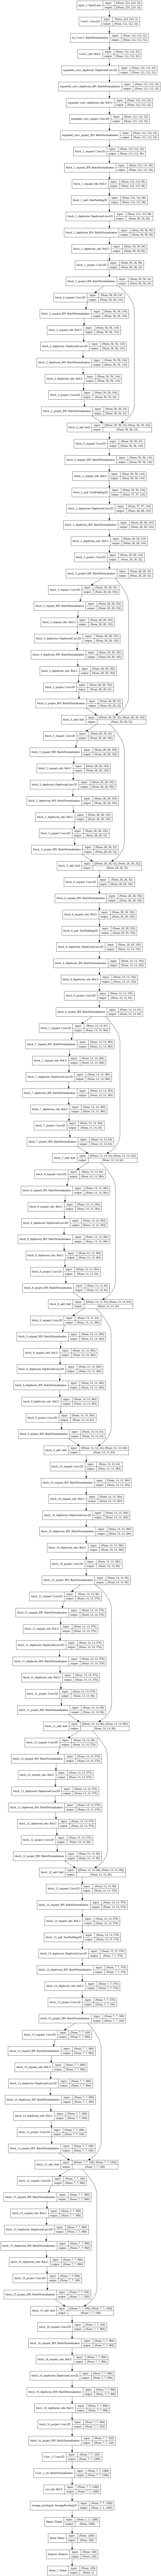

In [ ]:
plot_model(model_aug, to_file='model_aug_plot.png', show_shapes=True, show_layer_names=True)

# MODEL EVALUATION

## With Augmentation

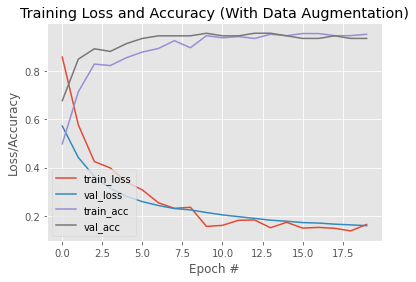

In [ ]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (With Data Augmentation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [ ]:
predictions = model_aug.predict(testing_images, batch_size=BS)
predicted_classes = []
for i in predictions:
  if i>0.5:
    predicted_classes.append(1)
  else:
    predicted_classes.append(0)

true_classes = testing_labels
class_labels = ['Credible','Not Credible']

classification_report(true_classes,predicted_classes)

'              precision    recall  f1-score   support\n\n           0       0.95      0.91      0.93        44\n           1       0.92      0.96      0.94        49\n\n    accuracy                           0.94        93\n   macro avg       0.94      0.93      0.94        93\nweighted avg       0.94      0.94      0.94        93\n'

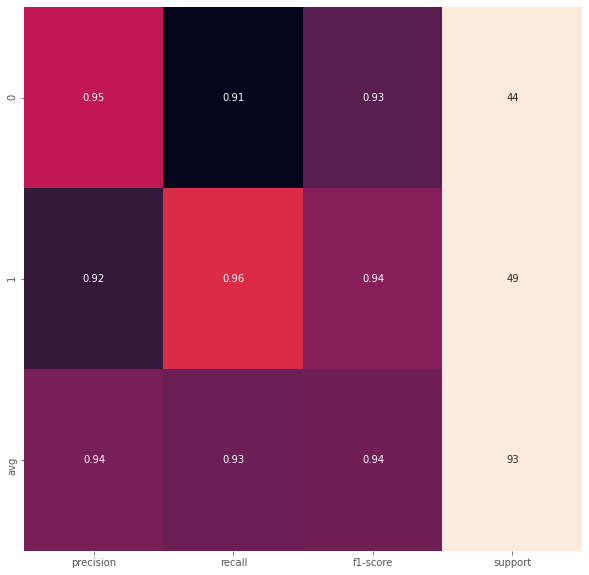

In [ ]:
def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=(10,10))

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
              
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                vmax=1)

plot_classification_report(true_classes, predicted_classes)

# Saving Image Scores for Master Dataset


In [ ]:
df = pd.DataFrame()

In [ ]:
data_paths = "/content/drive/MyDrive/images"
imagePaths = list(paths.list_images(data_paths))
ans = []

blogs = []
images = []

for i in imagePaths:
  print(i)
  if i.split('/')[-1].startswith('blog'):
    blogs.append({'name':i.split('/')[-1][4:],'path':i})
  elif i.split('/')[-1].startswith('image'):
    images.append({'name':i.split('/')[-1][5:],'path':i})

for i in blogs:
  if i['name'][-5:] == '.jpeg':
    i['name']=int(i['name'][:-5])
  else:
    i['name']=int(i['name'][:-4])

for i in images:
  if i['name'][-5:] == '.jpeg':
    i['name']=int(i['name'][:-5])
  else:
    i['name']=int(i['name'][:-4])

blogs = sorted(blogs, key=lambda k: k['name']) 
images = sorted(images, key=lambda k: k['name']) 

final = blogs + images


/content/drive/MyDrive/images/blog1.png
/content/drive/MyDrive/images/blog2.jpg
/content/drive/MyDrive/images/blog3.jpg
/content/drive/MyDrive/images/blog4.png
/content/drive/MyDrive/images/blog5.png
/content/drive/MyDrive/images/blog6.jpg
/content/drive/MyDrive/images/blog7.jpeg
/content/drive/MyDrive/images/blog8.jpg
/content/drive/MyDrive/images/blog9.jpg
/content/drive/MyDrive/images/blog10.jpg
/content/drive/MyDrive/images/blog11.jpg
/content/drive/MyDrive/images/blog12.jpg
/content/drive/MyDrive/images/blog13.png
/content/drive/MyDrive/images/blog14.png
/content/drive/MyDrive/images/blog15.jpg
/content/drive/MyDrive/images/blog16.jpg
/content/drive/MyDrive/images/blog17.jpg
/content/drive/MyDrive/images/blog18.jpg
/content/drive/MyDrive/images/blog19.jpg
/content/drive/MyDrive/images/blog20.png
/content/drive/MyDrive/images/blog21.png
/content/drive/MyDrive/images/blog22.png
/content/drive/MyDrive/images/blog23.jpeg
/content/drive/MyDrive/images/blog24.png
/content/drive/MyDrive/

In [ ]:
for i in final:
  image = load_img(i["path"], target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  check2 = []
  check2.append(image)
  check2= np.array(check2, dtype="float32")
  ans.append(model_aug.predict(check2))



/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for index,i in enumerate(ans):
  ans[index]=round(i[0][0]*10,ndigits=2)

In [ ]:
print(ans)

[9.57, 9.71, 9.85, 3.95, 6.72, 6.36, 0.38, 9.55, 9.92, 5.66, 9.9, 9.45, 3.45, 6.62, 0.78, 0.22, 0.18, 9.21, 9.19, 8.48, 9.33, 8.38, 0.6, 5.42, 8.15, 9.67, 7.99, 0.25, 2.19, 0.18, 9.02, 4.95, 0.2, 1.73, 0.11, 1.12, 0.18, 0.28, 5.6, 4.27, 0.04, 0.04, 2.58, 2.59, 9.36, 9.68, 1.45, 0.83, 3.02, 5.79, 2.71, 0.49, 2.28, 0.06, 9.68, 0.07, 0.34, 9.93, 1.21, 0.6, 1.32, 2.46, 1.91, 4.8, 3.04, 1.12, 9.76, 2.14, 5.58, 9.48, 4.01, 6.3, 6.51, 4.27, 4.23, 9.73, 0.15, 9.07, 0.03, 0.04, 0.02, 0.06, 0.03, 0.03, 0.21, 3.24, 0.05, 0.02, 0.37, 0.05, 0.06, 0.56, 0.06, 8.9, 0.03, 2.2, 0.3, 9.89, 0.18, 9.5, 0.07, 0.41, 7.27, 0.05, 0.09, 0.07, 0.64, 0.03, 0.91, 0.05, 0.05, 1.69, 3.7, 0.74, 0.24, 0.14, 0.05, 0.02, 0.18, 0.04, 0.1, 6.66, 5.66, 0.11, 0.0, 0.11, 0.11, 0.03, 0.02, 1.46, 9.96, 9.52, 1.46, 8.79, 0.24, 0.12, 2.72, 0.06, 0.14, 0.15, 0.75, 0.08, 0.2, 0.1, 0.14, 0.06, 0.1, 1.7, 0.04, 0.0, 0.09, 0.14, 0.03, 0.18, 0.02, 0.46, 0.25, 0.11, 2.2, 0.05, 7.1, 0.15, 0.01, 0.19, 0.59, 3.19, 0.16, 0.1, 5.72, 0.29, 0

In [ ]:
df['Image_Score']=ans

In [ ]:
df.to_csv(r'/content/imagescore.csv')